#Libraries

In [98]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re,nltk,json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer

In [99]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Dataset Read and statistics


In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
df_train = pd.read_csv('/content/drive/MyDrive/PR/Train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/PR/Test.csv')
df_val = pd.read_csv('/content/drive/MyDrive/PR/Val.csv')


In [102]:
df_train.head(1)

,ID,Data,Love,Joy,Surprise,Anger,Sadness,Fear,Topic,Domain,is_admin
0,5454,লকাল বাস ভালো এটা থেকে,0,0,0,0,1,0,Travel,Youtube,False


In [103]:
df_test.head(1)

,ID,Data,Love,Joy,Surprise,Anger,Sadness,Fear,Topic,Domain,is_admin
0,46,"তারাই মনে করে ব্রো বলা মানে ট্রল করা।""""- ব্রো""",0,0,0,1,0,0,Sports,Facebook,True


In [104]:
df_val.head(1)

,ID,Data,Love,Joy,Surprise,Anger,Sadness,Fear,Topic,Domain,is_admin
0,18313,চট্রগ্রাম এবং কক্সবাজার বন্যা কবলিত এলাকাতে ত্...,0,1,0,0,0,0,Business,Facebook,False


In [105]:
df_train.isnull().sum()

ID          0
Data        0
Love        0
Joy         0
Surprise    0
Anger       0
Sadness     0
Fear        0
Topic       0
Domain      0
is_admin    0
dtype: int64

In [106]:
df_test.isnull().sum()

ID          0
Data        0
Love        0
Joy         0
Surprise    0
Anger       0
Sadness     0
Fear        0
Topic       0
Domain      0
is_admin    0
dtype: int64

In [107]:
df_val.isnull().sum()

ID          0
Data        0
Love        0
Joy         0
Surprise    0
Anger       0
Sadness     0
Fear        0
Topic       0
Domain      0
is_admin    0
dtype: int64

In [108]:
df_train.drop(columns=['Topic', 'Domain', 'is_admin'], inplace=True)
df_test.drop(columns=['Topic', 'Domain', 'is_admin'], inplace=True)
df_val.drop(columns=['Topic', 'Domain', 'is_admin'], inplace=True)

In [109]:
df_train.head(1)

,ID,Data,Love,Joy,Surprise,Anger,Sadness,Fear
0,5454,লকাল বাস ভালো এটা থেকে,0,0,0,0,1,0


In [110]:
df_test.head(1)

,ID,Data,Love,Joy,Surprise,Anger,Sadness,Fear
0,46,"তারাই মনে করে ব্রো বলা মানে ট্রল করা।""""- ব্রো""",0,0,0,1,0,0


In [111]:
df_val.head(1)

,ID,Data,Love,Joy,Surprise,Anger,Sadness,Fear
0,18313,চট্রগ্রাম এবং কক্সবাজার বন্যা কবলিত এলাকাতে ত্...,0,1,0,0,0,0


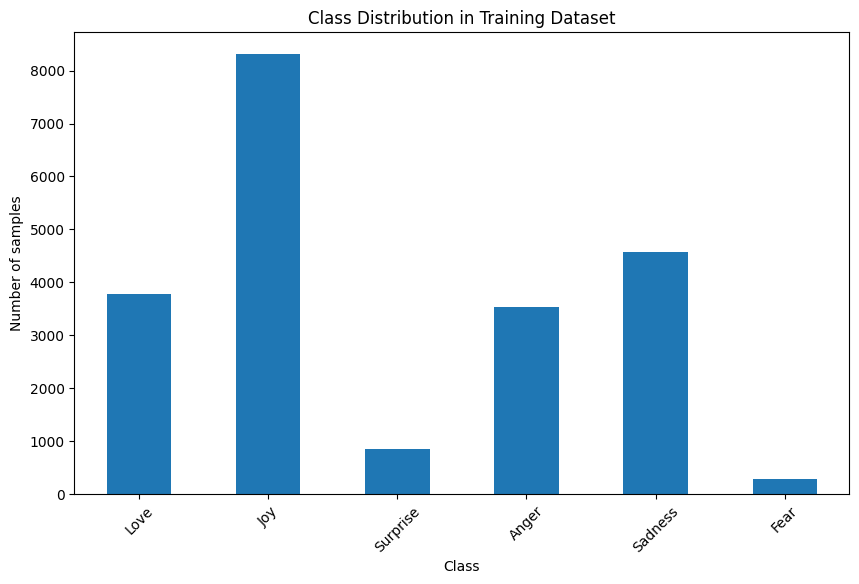

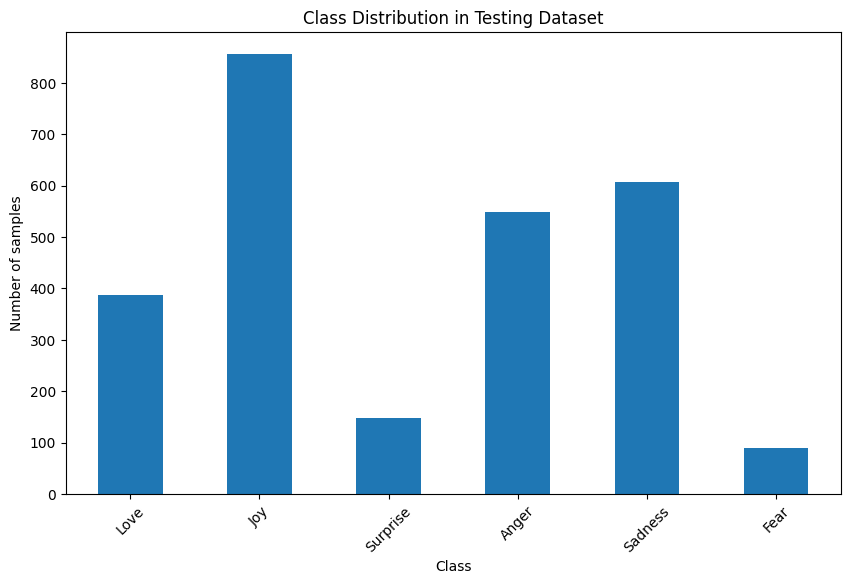

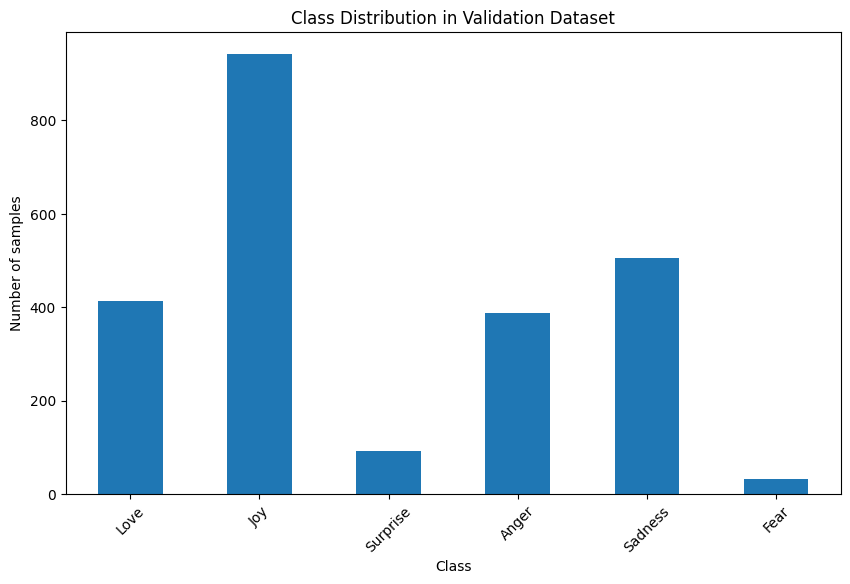

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to plot class distribution
def plot_class_distribution(df, dataset_name):
    class_counts = df.iloc[:, -6:].sum()
    plt.figure(figsize=(10, 6))
    class_counts.plot(kind='bar')
    plt.title(f'Class Distribution in {dataset_name} Dataset')
    plt.xlabel('Class')
    plt.ylabel('Number of samples')
    plt.xticks(rotation=45)  # Rotate class labels for better readability if needed
    plt.show()

# Plot class distribution for each dataset
plot_class_distribution(df_train, 'Training')
plot_class_distribution(df_test, 'Testing')
plot_class_distribution(df_val, 'Validation')


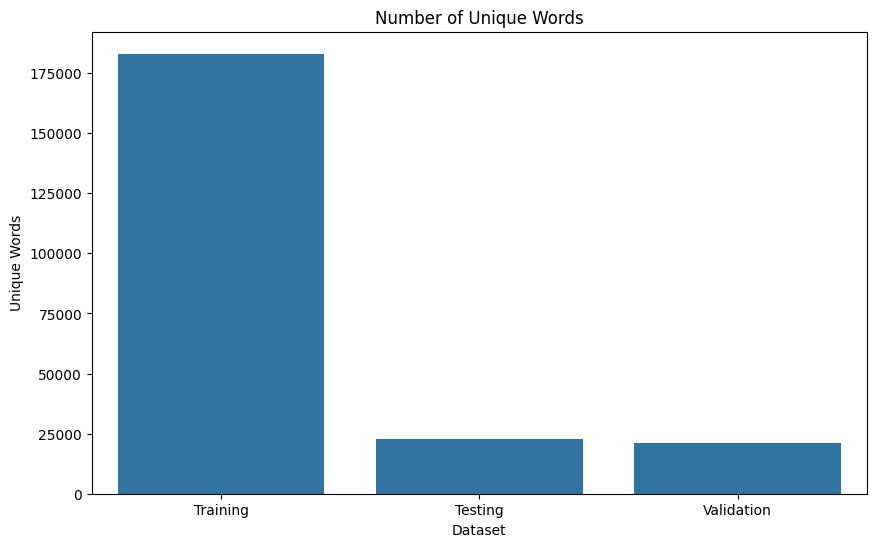

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the CSV files are already loaded into DataFrames: df_train, df_test, df_val
# Calculate the number of unique words for each dataset
unique_words_train = df_train['Data'].apply(lambda x: len(set(x.split()))).sum()
unique_words_test = df_test['Data'].apply(lambda x: len(set(x.split()))).sum()
unique_words_val = df_val['Data'].apply(lambda x: len(set(x.split()))).sum()

# Prepare the data for plotting
unique_words_data = {
    'Dataset': ['Training', 'Testing', 'Validation'],
    'Unique Words': [unique_words_train, unique_words_test, unique_words_val]
}

unique_words_df = pd.DataFrame(unique_words_data)

# Plot the number of unique words
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Unique Words', data=unique_words_df)
plt.title('Number of Unique Words')
plt.show()


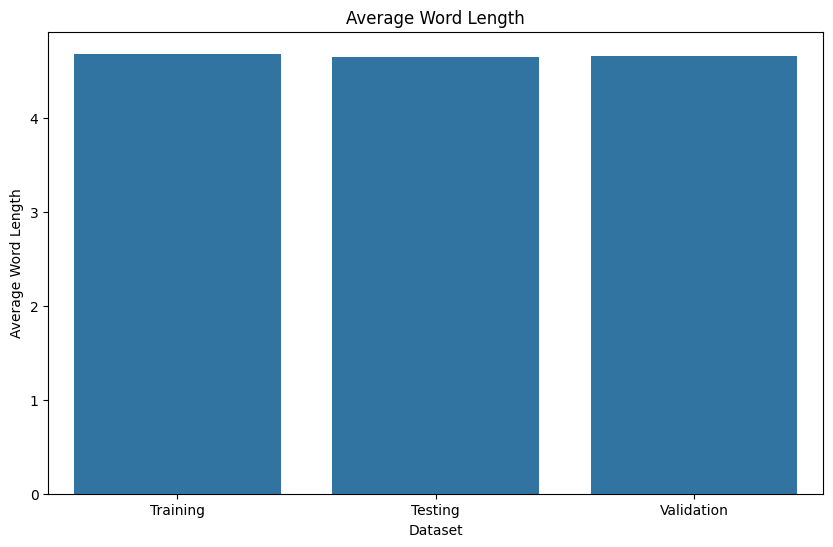

In [114]:
# Calculate the average word length for each dataset
avg_word_length_train = df_train['Data'].apply(lambda x: np.mean([len(word) for word in x.split()])).mean()
avg_word_length_test = df_test['Data'].apply(lambda x: np.mean([len(word) for word in x.split()])).mean()
avg_word_length_val = df_val['Data'].apply(lambda x: np.mean([len(word) for word in x.split()])).mean()

# Prepare the data for plotting
avg_word_length_data = {
    'Dataset': ['Training', 'Testing', 'Validation'],
    'Average Word Length': [avg_word_length_train, avg_word_length_test, avg_word_length_val]
}

avg_word_length_df = pd.DataFrame(avg_word_length_data)

# Plot the average word length
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Average Word Length', data=avg_word_length_df)
plt.title('Average Word Length')
plt.show()


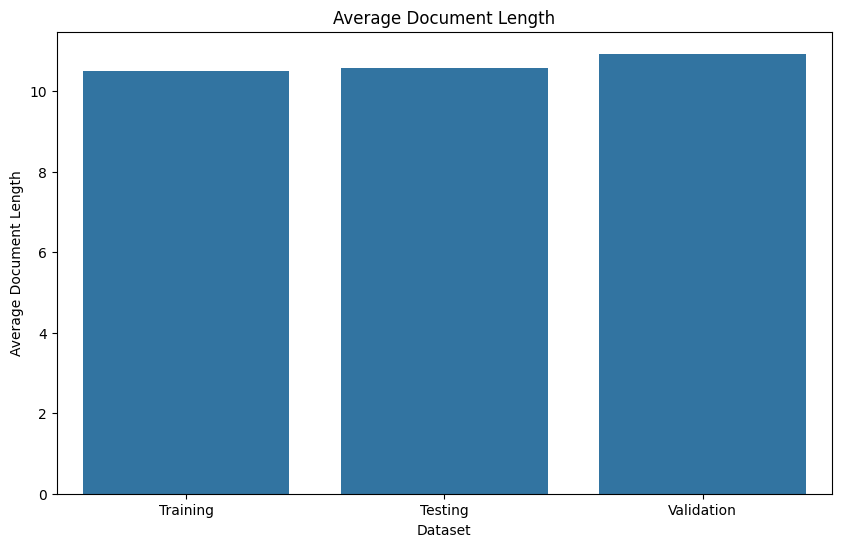

In [115]:
# Calculate the average document length for each dataset
avg_doc_length_train = df_train['Data'].apply(lambda x: len(x.split())).mean()
avg_doc_length_test = df_test['Data'].apply(lambda x: len(x.split())).mean()
avg_doc_length_val = df_val['Data'].apply(lambda x: len(x.split())).mean()

# Prepare the data for plotting
avg_doc_length_data = {
    'Dataset': ['Training', 'Testing', 'Validation'],
    'Average Document Length': [avg_doc_length_train, avg_doc_length_test, avg_doc_length_val]
}

avg_doc_length_df = pd.DataFrame(avg_doc_length_data)

# Plot the average document length
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Average Document Length', data=avg_doc_length_df)
plt.title('Average Document Length')
plt.show()


#Preprocessing

In [116]:
def remove_punctuations(my_str):
    # define punctuation
    #punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌😀😃😄😁😆🥹😅🤣😂🥲😊😇🙂🙃😉😌😍🥰😘😗😙😚😋😛😝😠😤😭😢🥺😩😫😖😣☹️🙁😕😟😔😞😒😏🥳🤩🥸😎🤓🧐🤨🤪😜😡🤬🤯😳🥵🥶😶‍🌫️😱😨😰😥😓🤗🤔🫣🤭🫢🫡🤫🫠🤥😶🫥😐🫤😑😈🤠🤑🤕🤒😷🤧🤮🤢🥴🤐😵‍💫😵😮‍💨😪🤤😴🥱😲😮😧😦😯🙄😬🫨🫶🤲👐🙌👏🤚☝️✋👇👆👉👈🫴🫴🫳🤏🤌👌🤘🤟🫰✌️🤞🫸🫷🤜🤛✊👊👎👍🤝🖐️🖖👋🤙🫲🫱💪🖕🙏🫵✍️👀🩷❤️🧡💛💚🩵💙💜🖤🩶🤍🤎�￰৷￰'''
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct

In [117]:
def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

In [118]:
def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [119]:
df_train['text'] = df_train.Data.apply(lambda x: preprocessing(str(x)))
df_test['text'] = df_test.Data.apply(lambda x: preprocessing(str(x)))
df_val['text'] = df_val.Data.apply(lambda x: preprocessing(str(x)))

In [120]:
df_train = df_train.drop(['Data'], axis=1)
df_train.head(2)
df_test = df_test.drop(['Data'], axis=1)
df_test.head(2)
df_val = df_val.drop(['Data'], axis=1)
df_val.head(2)

,ID,Love,Joy,Surprise,Anger,Sadness,Fear,text
0,18313,0,1,0,0,0,0,চট্রগ্রাম এবং কক্সবাজার বন্যা কবলিত এলাকাতে ত্...
1,13039,0,0,0,1,0,0,আমার কাছে ছিল শুধু রিহানের ফটো এলবাম বছর দুয়েক...


In [121]:
sample_data = [10,100,150,2000,2500,4000,4500,5000]
for i in sample_data:
     print(f"Cleaned Text: \n {df_train.text[i]}\n")

sample_data = [100,150]
for i in sample_data:
     print(f"Cleaned Text: \n {df_test.text[i]}\n")

sample_data = [10,100,150]
for i in sample_data:
     print(f"Cleaned Text: \n {df_val.text[i]}\n")

Cleaned Text: 
 অসাধারণ ধন্যবাদ অমি ভাই সহ পুরো ব্যাচেলর টিম কে 

Cleaned Text: 
 অনেক ভালো লাগলো গানটা শুনে 

Cleaned Text: 
 আমারা সবাই একা কিন্তু সবাই মিলে আমরা একা নাএভাবে একজন একজনের দায়িত্ব নিলে রানারা পাবে একটা সুন্দর জীবন  

Cleaned Text: 
 ছেলে গুলা জেমন গরদব মেয়ে গুলাও তেমন 

Cleaned Text: 
 তুমিই তো শিখিয়েছ অভিজ্ঞতা লাভ ও শিক্ষা পাওয়ার জন্যই আমাদের জন্ম তুমি বলেছিলে 

Cleaned Text: 
 ইচ্ছে ছিল শিশর হব 

Cleaned Text: 
 দেশের ভাগ্য ওরা করে বিক্রয় ওরা মানুষের অন্ন 

Cleaned Text: 
 দিন দিন বাংলাদেশের নাটকগুলা অশ্লিল হয়ে যাচ্ছে 

Cleaned Text: 
 চা কাপে নাবাটিতে বা গামলায় খাইলে ভাল হতো 

Cleaned Text: 
 অামি হেল্প চাই সবার কাছে  চ্যানালটি সাবস্ক্রাইফ করুন প্লীজ অামার চ্যানালটি সাবক্রাইফ করুন 

Cleaned Text: 
 গুলি করে মারা হোক জনসম্মুখে 

Cleaned Text: 
 ভাই সব আমরা তাহেরী কে নিয়ে মজা করি আসলে এই গুলা টিক না আপনি ও একজন মুসলিম সেও একজন মুসলিম তকে নিয়ে এরকম হাশি তামাশা করা টিক না বাবতে আরেন আমি তাহেরীর বক্ত আসলে আমি তার কিছুই না বরং বল্লাম এই কারনে আমাদের এই সব দেখে ইহুদী ক্রিস

In [122]:
df_train.to_csv('Final_Train.csv', index = False)
df_val.to_csv('Final_Val.csv', index = False)
df_test.to_csv('Final_Test.csv', index = False)